<a href="https://colab.research.google.com/github/joaochenriques/GeneratorCalib/blob/main/FFT_filterResponse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://tomroelandts.com/articles/how-to-plot-the-frequency-response-of-a-filter

In [2]:
# If running python on Windows operating system, copy the file:
# https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py
# to the working folder before running the notebook
import matplotlib.pyplot as mpl

import pathlib
if not pathlib.Path("mpl_utils.py").exists():
  !curl -O https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py 

import mpl_utils as mut
mut.config_plots()

%config InlineBackend.figure_formats = ['svg']
mpl.rcParams["figure.figsize"] = (6,4.5)

import numpy as np
from scipy import signal

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3483  100  3483    0     0   8292      0 --:--:-- --:--:-- --:--:--  8273


0.9999999999999999

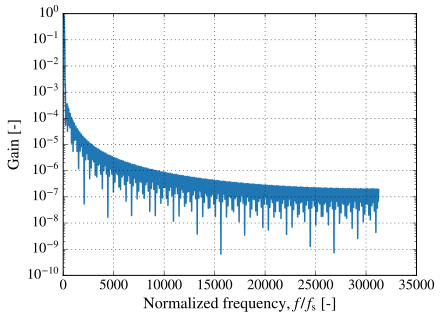

In [31]:
fc = 100  # Cutoff frequency as a fraction of the sampling rate (in (0, 0.5)).
fs = 62500

M = 1251    # Number of coefficients.
L = 1024*2  # Length of frequency response.
 
# Compute sinc filter with Hamming window.
m  = int( ( M-1 ) / 2 )
k =  np.linspace( -m, m, 2*m+1 )

sigma = 0.35
h = 2 * fc / fs * np.sinc( 2 * fc / fs * k ) * np.hamming(M)
# h = 2 * fc / fs * np.sinc( 2 * fc / fs * k ) * np.exp( -0.5*(k/fs)**2/sigma**2 ) 
h /= np.sum(h)
 
# Pad filter with zeros.
h_padded = np.zeros(L)
h_padded[0 : M] = h
 
# Compute frequency response; only keep first half.
H = np.abs(np.fft.fft( h_padded) )[0 : L // 2 + 1]
 
# Plot frequency response (in dB).
mpl.figure()
mpl.semilogy( np.linspace( 0, 0.5*fs, len(H) ), H)
mpl.xlabel( r'Normalized frequency, $f\,/\,f_\mathrm{s}$ [-]' )
mpl.ylabel('Gain [-]')
mpl.grid()
np.sum(h)